<a href="https://colab.research.google.com/github/therab6it/UCSD_CSE151A-SS1/blob/Milestone-2/Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Submission for Milestone 2.

> Commit changes to the GitHub repo by clicking on *File > Save a copy in GitHub*. Select the correct repository (**/UCSD_151A-SS1**) and branch (**Milestone-2**) and include a meaningful commit message.



In [ ]:
# Data Exploration

In [ ]:
os.chdir('/content/drive/MyDrive/UCSD_CSE151A-SS1')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
votes_df = pd.read_csv('compiled.csv')
bills_df = pd.read_csv('billinforound2.csv')
members_df = pd.read_csv('congress_members.csv')

In [ ]:
votes_df = votes_df.drop(['Unnamed: 0'], axis=1)
votes_df.rename(columns={'name': 'bioguide_id'}, inplace=True)
merged_df = pd.merge(members_df, votes_df, on='bioguide_id', how='inner')

In [ ]:
merged_df.head()

,bioguide_id,full_name,state,gender,party,102_hconres_121,102_hconres_191,102_hconres_192,102_hconres_246,102_hconres_287,...,118_sjres_42,118_sjres_43,118_sjres_57,118_sjres_58,118_sjres_61,118_sjres_62,118_sjres_9,118_sres_13,118_sres_21,118_sres_417
0,B000944,Sherrod Brown,OH,M,Democrat,absent,absent,absent,absent,absent,...,Nay,Nay,Nay,Yea,Yea,Yea,Nay,Yea,Yea,Yea
1,C000127,Maria Cantwell,WA,F,Democrat,absent,absent,absent,absent,absent,...,Nay,Nay,Nay,Nay,Nay,Yea,Nay,Yea,Yea,Yea
2,C000141,Benjamin L. Cardin,MD,M,Democrat,absent,absent,absent,absent,absent,...,Nay,Nay,Nay,Nay,Nay,Nay,Nay,Yea,Yea,Yea
3,C000174,Thomas R. Carper,DE,M,Democrat,absent,absent,absent,absent,absent,...,Nay,Nay,Nay,Nay,Nay,Nay,Nay,Yea,Yea,Yea
4,C001070,"Robert P. Casey, Jr.",PA,M,Democrat,absent,absent,absent,absent,absent,...,Nay,Nay,Nay,Yea,Nay,Nay,Nay,Yea,Yea,Yea




---



In [ ]:
df_melted = merged_df.melt(id_vars=['bioguide_id', 'full_name', 'state', 'gender', 'party'],
                    var_name='bill',
                    value_name='vote')

In [ ]:
df_melted.head()

,bioguide_id,full_name,state,gender,party,bill,vote
0,B000944,Sherrod Brown,OH,M,Democrat,102_hconres_121,absent
1,C000127,Maria Cantwell,WA,F,Democrat,102_hconres_121,absent
2,C000141,Benjamin L. Cardin,MD,M,Democrat,102_hconres_121,absent
3,C000174,Thomas R. Carper,DE,M,Democrat,102_hconres_121,absent
4,C001070,"Robert P. Casey, Jr.",PA,M,Democrat,102_hconres_121,absent


In [ ]:
df_yea = df_melted[df_melted['vote'] == 'Yea']

party_approval = df_yea.groupby(['party', 'bill']).size().unstack(fill_value=0)
state_approval = df_yea.groupby(['state', 'bill']).size().unstack(fill_value=0)

In [ ]:
bills_df['committees'].str.split(',').explode().value_counts()

committees
(('House'                                      2469
)                                              2227
 ('House'                                      1916
 'Rules Committee')                            1443
(('Senate'                                     1002
                                               ... 
 'Indian Affairs Committee'))                     3
 and Urban Affairs Committee'))                   3
 'Post Office and Civil Service Committee')       2
 'Intelligence (Select) Committee'))              2
 and Forestry Committee'))                        1
Name: count, Length: 83, dtype: int64



---



In [ ]:
# Plotting

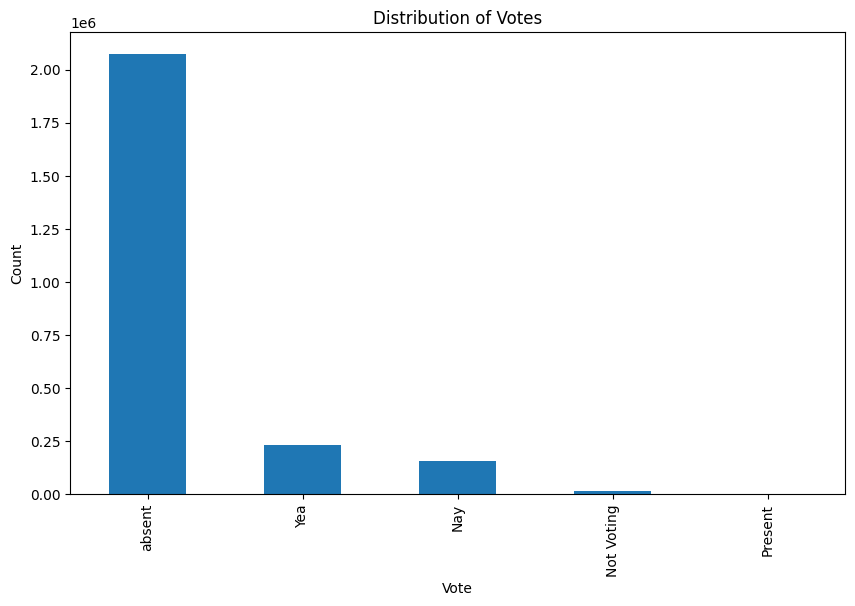

In [ ]:
# Bar chart of distribution of voting results
import pandas as pd
import matplotlib.pyplot as plt

votes_long_df = merged_df.melt(id_vars=['bioguide_id', 'full_name', 'state', 'gender', 'party'],
                               var_name='Resolution',
                               value_name='Vote')

vote_counts = votes_long_df['Vote'].value_counts()

vote_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Vote')
plt.ylabel('Count')
plt.title('Distribution of Votes')
plt.show()

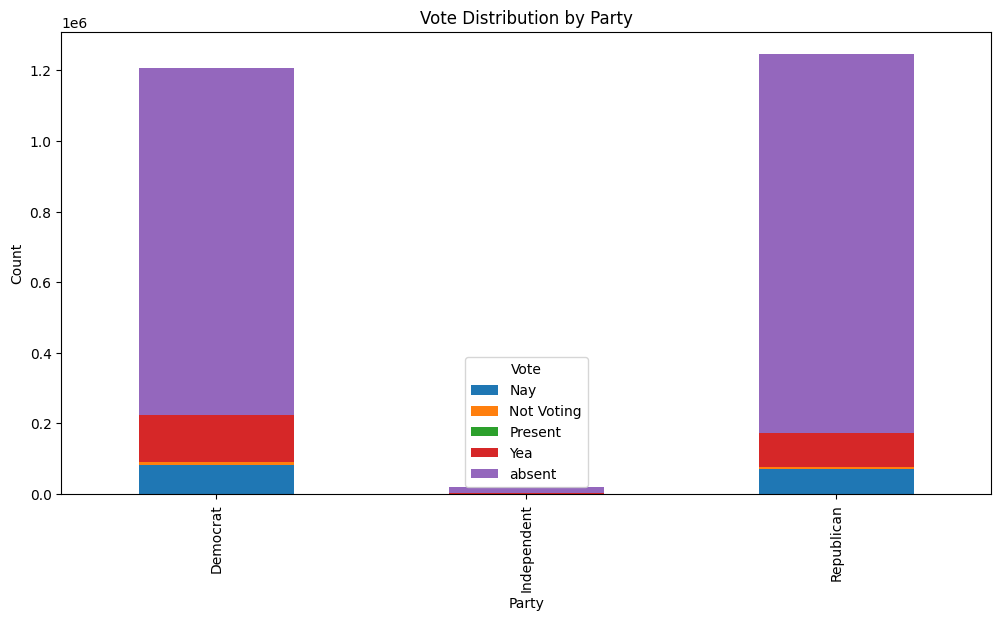

In [ ]:
# Voting tendencies of different political parties
votes_long_df = merged_df.melt(id_vars=['bioguide_id', 'full_name', 'state', 'gender', 'party'],
                               var_name='Resolution',
                               value_name='Vote')

party_vote_counts = votes_long_df.groupby(['party', 'Vote']).size().unstack()

party_vote_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Party')
plt.ylabel('Count')
plt.title('Vote Distribution by Party')
plt.legend(title='Vote')
plt.show()

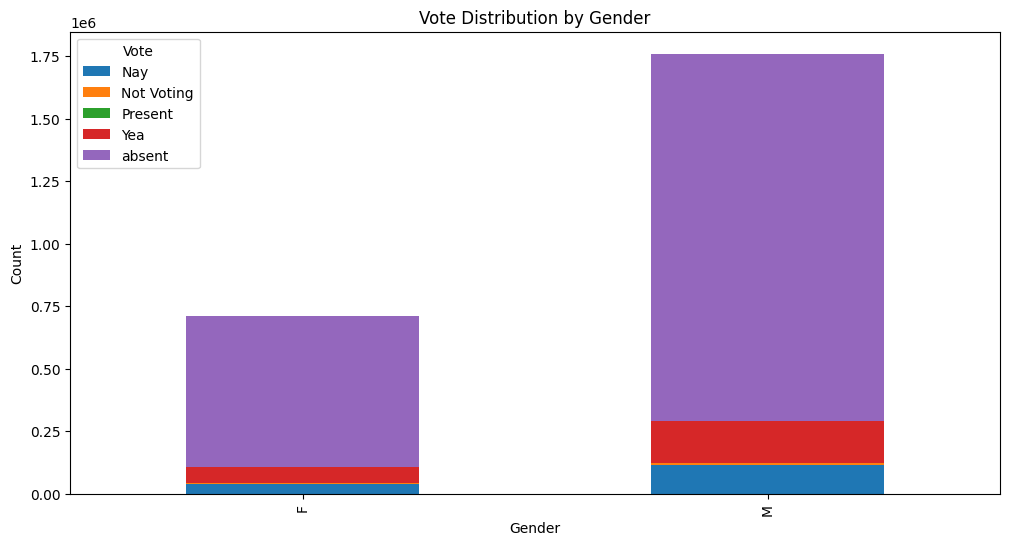

In [ ]:
# Gender Performance in Voting

gender_vote_counts = votes_long_df.groupby(['gender', 'Vote']).size().unstack()

gender_vote_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Vote Distribution by Gender')
plt.legend(title='Vote')
plt.show()

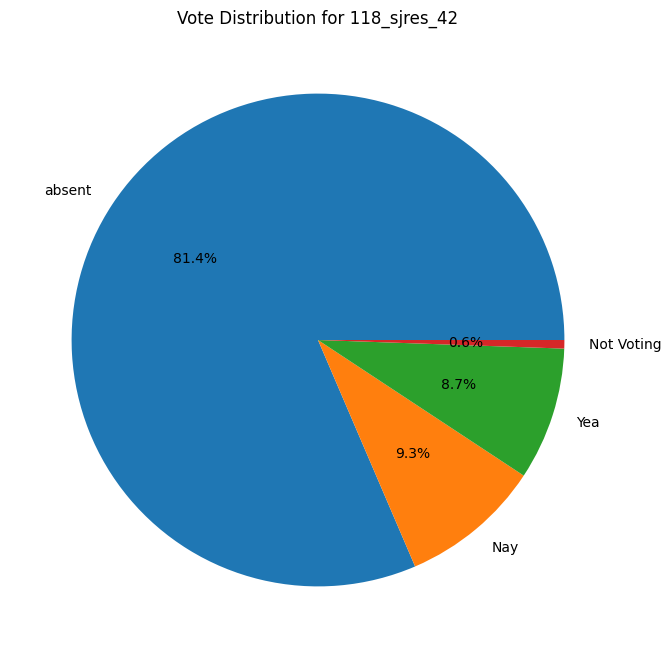

In [ ]:
# Voting results for different proposals

resolution = '118_sjres_42'

resolution_vote_counts = merged_df[resolution].value_counts()

resolution_vote_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title(f'Vote Distribution for {resolution}')
plt.ylabel('')
plt.show()

In [ ]:
bills = merged_df.columns.tolist()
print(bills)

feature_list = merged_df['full_name'].tolist()
congressmen = [x for x in feature_list if x not in ['bioguide_id','full_name','state','party']]
print(congressmen)

color_map = {'Yea': 'green', 'Nay': 'red'}

fig, ax = plt.subplots(figsize=(12, 8))

for i, congressman in enumerate(congressmen):
    for j, bill in enumerate(bills):
        vote_result = merged_df.loc[i, bill]
        color = color_map.get(vote_result, 'gray')

        ax.scatter(j, i, color=color, s=100)

ax.set_yticks(range(len(congressmen)))
ax.set_yticklabels(congressmen)
ax.set_xticks(range(len(bills)))
ax.set_xticklabels(bills, rotation=90)
ax.set_xlabel('Bills')
ax.set_ylabel('Congressmen')
ax.set_title('Congressmen Voting on Bills')

plt.tight_layout()
plt.show()